In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
#individual bi-grams
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        print(ch1, ch2) 

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


learning the statistics of which characters follow which character by storing the count

In [5]:
#individual bi-grams
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2) 
        b[bigram] = b.get(bigram,0)+1
        #print(ch1, ch2)

In [6]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [7]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

Keeping this information in a 2day array, rows will be the first character, column would be the second character using PyTorch

In [11]:
import torch
N = torch.zeros((28,28), dtype = torch.int32)

In [12]:
chars = sorted(list(set(''.join(words)))) 
stoi = {s:i for i,s in enumerate(chars)} #create a mapping from character to integers
stoi['<S>'] = 26
stoi['<E>'] = 27

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[ix1,ix2] +=1


In [16]:
itos = {i:s for s,i in stoi.items()}


(-0.5, 27.5, 27.5, -0.5)

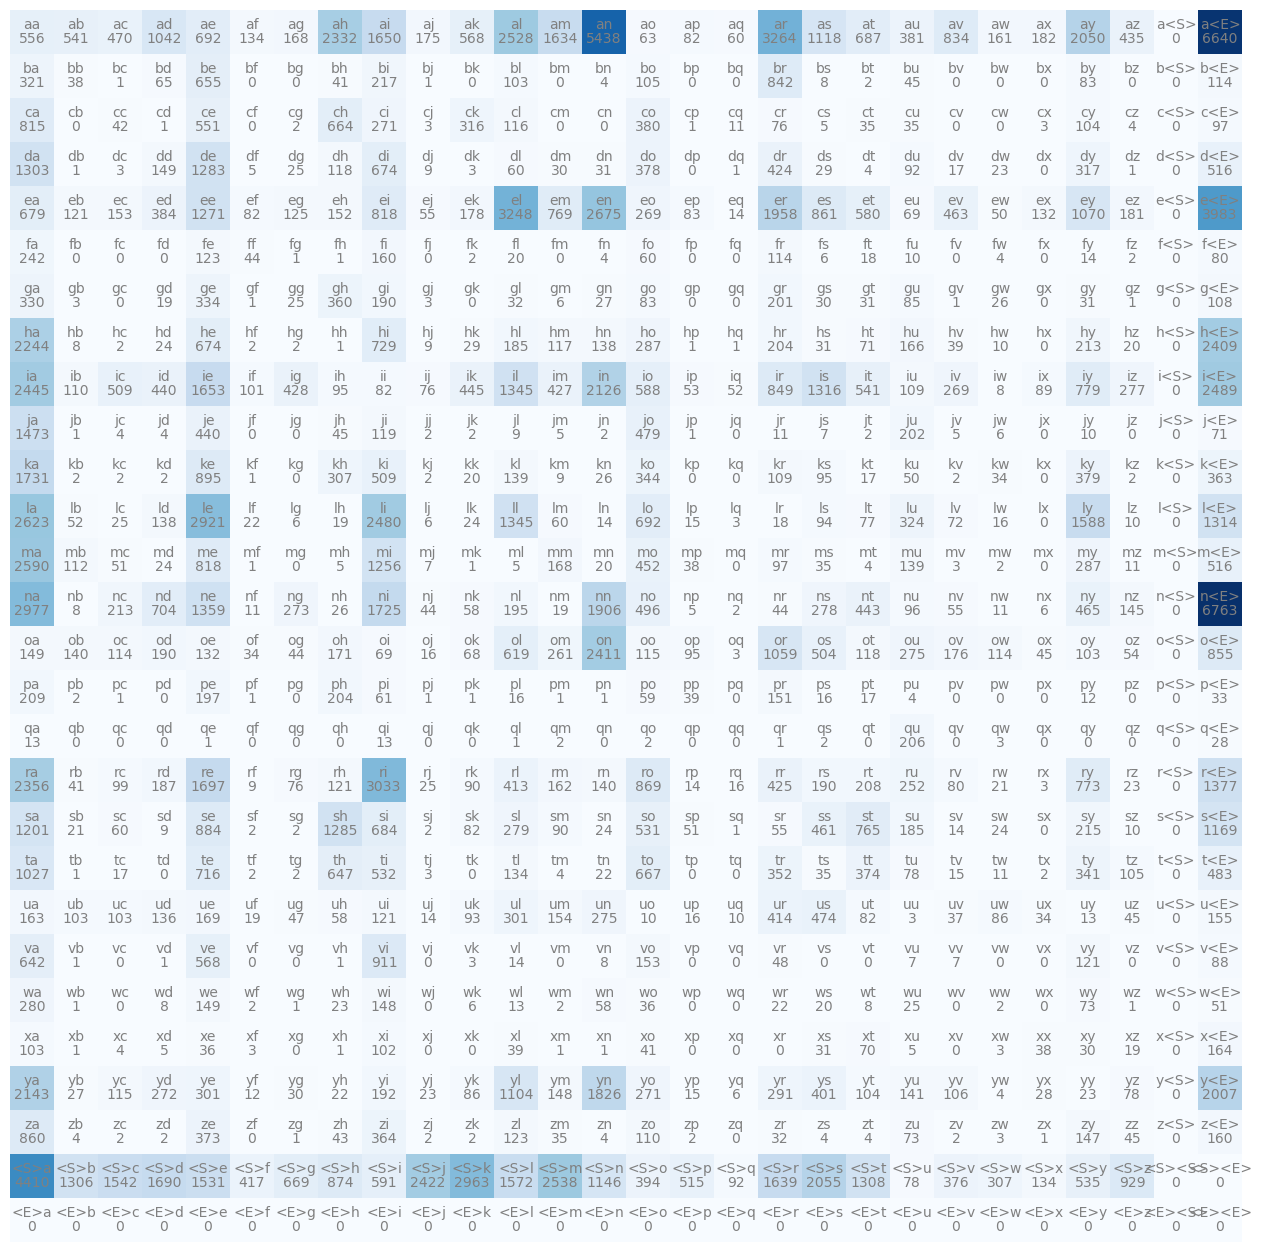

In [17]:
import matplotlib.pyplot as plt
#plt.imshow(N)

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j,i,N[i,j].item(),ha = 'center', va = 'top', color = 'gray')
plt.axis('off')

(-0.5, 26.5, 26.5, -0.5)

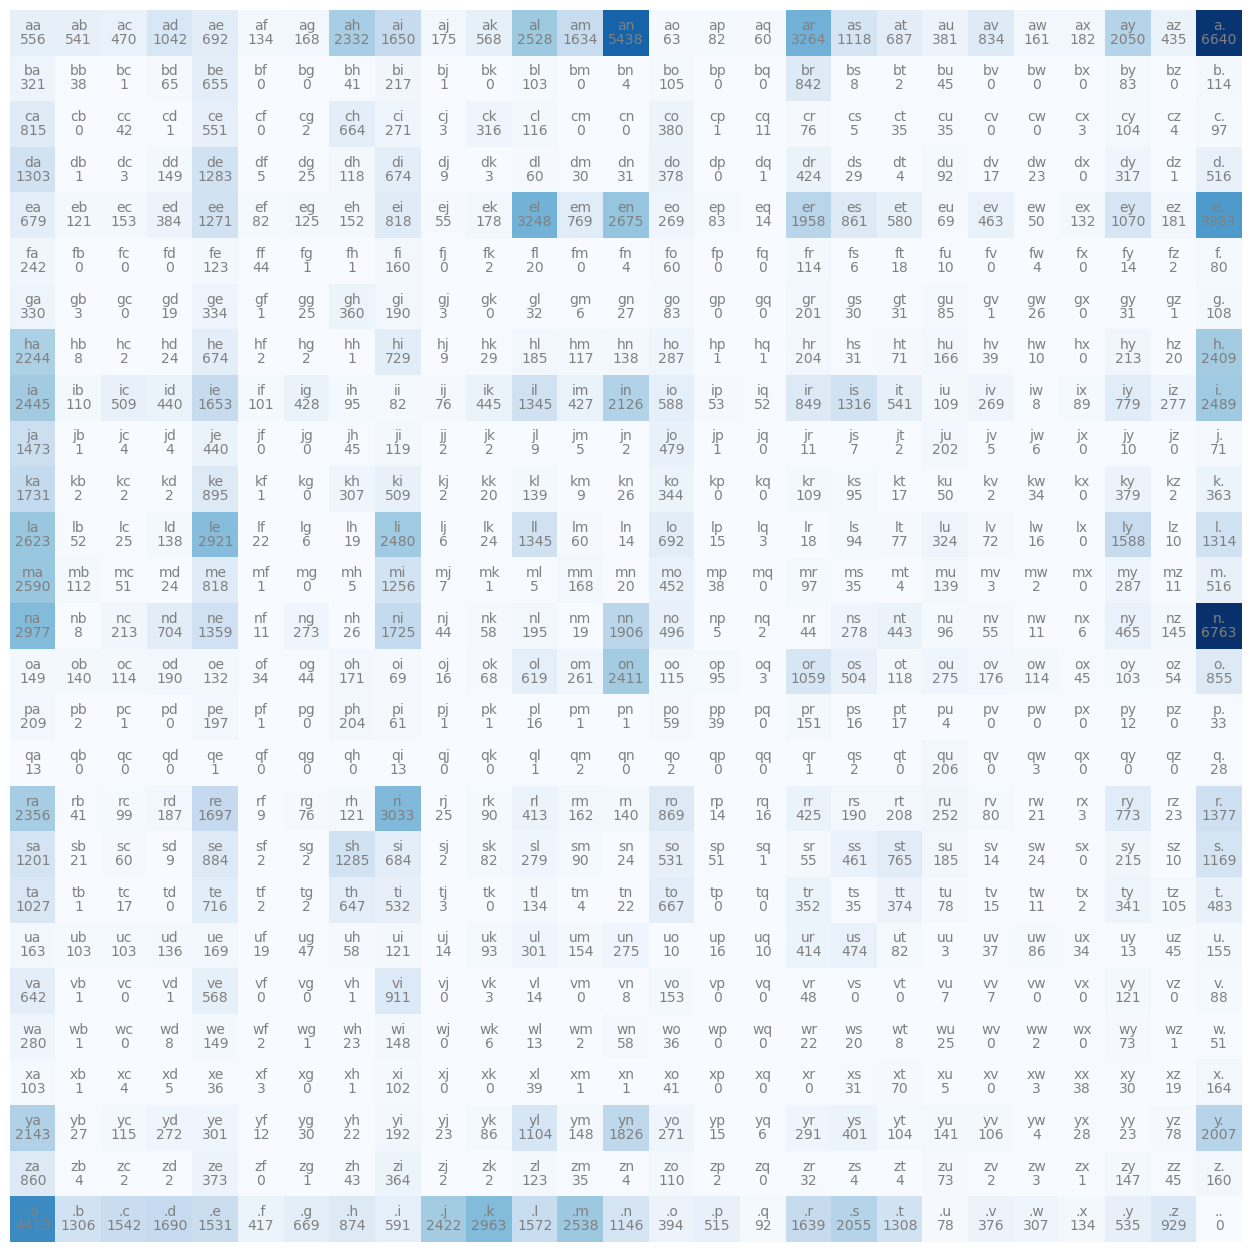

In [44]:
#Replacing <s> and <e> with "."
N = torch.zeros((27,27), dtype = torch.int32)

chars = sorted(list(set(''.join(words)))) 
stoi = {s:i for i,s in enumerate(chars)} #create a mapping from character to integers
stoi['.'] = 26

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[ix1,ix2] += 1

itos = {i:s for s,i in stoi.items()}

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j,i,N[i,j].item(),ha = 'center', va = 'top', color = 'gray')
plt.axis('off')


In [45]:
#Using torch.multinomial and generator

p = N[0].float()
p = p / p.sum()
p

tensor([0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688, 0.0487,
        0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018, 0.0963,
        0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128, 0.1960])

In [46]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [47]:
torch.multinomial(p, num_samples = 100, replacement= True, generator = g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [49]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix  = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        #print(ix)
        out.append(itos[ix])
        #print(itos[ix])
        if ix==26:
            break

    print(''.join(out))

tysad.
.
dissi.
s.
z.
rgsan.
nttan.
heiasli.
n.
.


In [50]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix  = 0
    while True:
        '''p = N[ix].float()
        p = p / p.sum()'''
        p = torch.ones(27)/27.0
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        #print(ix)
        out.append(itos[ix])
        #print(itos[ix])
        if ix==26:
            break

    print(''.join(out))

rwtbbzycrsrnzrxv.
ojwbovlpuekweiearopznu.
evrlbuefulqgkehjhwmfkglstrmxojshii.
xmvajedyadfln.
vdkokpfpwkwshhrsksadgcibcltmqpldayuyxcqnlovvtyeh.
gfyixrqmeqeox.
wlzytrkgpsrrqgytuxlgpvgiwxgintvzzpuwdwwrqgdczekdpvilbklirooqrnnmmbpserzaht.
qxa.
mhjkjoboh.
.


In [51]:
#bigrams is better

In [86]:
P = (N+1).float()

In [71]:
P.shape

torch.Size([27, 27])

In [72]:
P.sum(1,keepdim=True).shape

torch.Size([27, 1])

In [87]:
#Broadcasting semantics
P = P / P.sum(1,keepdim = True)
P[0].sum()

tensor(1.)

In [88]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix  = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        #print(ix)
        out.append(itos[ix])
        #print(itos[ix])
        if ix==26:
            break

    print(''.join(out))

tysad.
.
dissi.
s.
z.
rgsan.
nttan.
heiasli.
n.
.


In [94]:
#summarise the quality of this model at how good this is with a single number

log_like = 0
n = 0
#for w in words:
for w in ["andrejq"]:
    chs = ['.']  +list(w) + ['.']

    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_like += logprob
        n+=1
        #print(f'{ch1}{ch2}: {prob:.4f}')

print(log_like)
nll = -1*log_like

print(f'{nll/n:.4f}')

tensor(-27.8672)
3.4834


In [90]:
#Cast the bi-gram model into a neural network framework
#tune the network so it is correctly predicting probabilities of next character

In [98]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [99]:
xs

tensor([26,  4, 12, 12,  0])

In [100]:
#how to feed in these examples into a neural network

In [107]:
from torch.nn.functional import one_hot
xenc = one_hot(xs,num_classes = 27).float() #float added as one_hot does not support dtype argument and we want to feed floats to the nn
xenc.shape

torch.Size([5, 27])

In [108]:
xenc

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

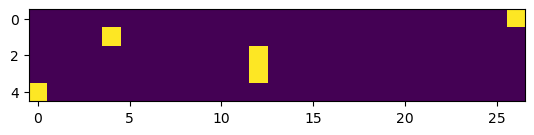

In [109]:
plt.imshow(xenc)

In [110]:
W = torch.randn((27,1))
xenc @ W

tensor([[ 1.6277],
        [-0.8369],
        [ 0.6664],
        [ 0.6664],
        [-0.8086]])

In [111]:
#We want 27 neurons in the output too
W = torch.randn((27,27))
(xenc @ W)

tensor([[-0.8422, -1.0088, -1.9508,  0.6176, -0.3151, -1.7420,  1.1555, -1.7500,
          0.4032, -0.4525,  0.1690,  0.1474,  0.5031,  1.3645, -0.9156,  0.3476,
         -0.3616,  1.4103, -0.3787, -0.0719, -1.0485, -0.7427, -0.3315, -1.0186,
          0.7677,  0.9268,  0.4188],
        [-0.3593, -1.9898,  0.1523,  1.4816, -0.7902, -0.0961,  0.1378, -0.5419,
         -0.6556, -0.2083, -1.0083, -0.9766, -0.7043, -0.8765, -1.0810, -0.2399,
          1.3295, -0.3964, -0.3084, -1.8649, -0.9620, -0.2524,  0.4955, -1.2820,
         -1.6038,  0.0868,  2.1161],
        [-2.4724,  0.5410,  0.3281, -2.0970, -1.1762, -0.8130,  1.3343,  1.0915,
          0.0317, -0.3855,  1.5915,  1.1446, -0.3036,  0.1348,  0.7744, -0.1296,
          0.1724,  0.5083,  2.2806,  1.1533,  0.4689,  0.4277, -0.2765, -0.7605,
         -0.3749, -0.8336, -0.5572],
        [-2.4724,  0.5410,  0.3281, -2.0970, -1.1762, -0.8130,  1.3343,  1.0915,
          0.0317, -0.3855,  1.5915,  1.1446, -0.3036,  0.1348,  0.7744, -0.1296

In [114]:
#How is the 13th o/p fired from the input received at 3rd neuron
(xenc @ W)[3,13]

tensor(0.1348)

In [115]:
#This was the dot product of 3rd input and 13th column of Weight (5 rows)

In [116]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [122]:
W[:,13]

tensor([-0.2340,  0.3991,  0.7872,  0.6706, -0.8765,  0.2459,  0.6502, -0.9237,
        -0.5415, -1.5611,  0.4452, -0.4773,  0.1348,  1.1396, -0.3601, -0.1893,
         0.0869,  0.9070, -1.2130, -0.9256,  0.6665, -0.8655,  0.8945, -0.3834,
        -0.0406,  0.2884,  1.3645])

In [123]:
(xenc[3]*W[:,13]).sum()

tensor(0.1348)